In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

En este ejercicio se hace un regresión lineal univariable. El primer paso será importar los datos con los que vamos a trabajar.

In [32]:
def import_data(filename):
    try:
        with open(filename, 'r') as file:
            reader = csv.reader(file)
            next(reader) # Jump first row
            data = [[float(row[0]), float(row[1])] for row in reader]
            data = np.array(data)
        return data
    except FileNotFoundError:
        print(f"Error: El archivo '{filename}' no fue encontrado.")
        return None
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return None

data = import_data("salary_data.csv")

if data is None:
    print("Error crítico: No se pudieron cargar los datos necesarios para continuar. Terminando el programa.")
    exit()

x_train = data[:,0]
y_train = data[:,1]

print(x_train)
print(y_train)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872. 127345. 126756. 128765. 135675. 139465.]


Luego, debemos de implementar la función $f_{w, b}(x^{(i)}) = wx^{(i)}+b$ en código:

In [27]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

La función de costo $J(w,b) = \frac{1}{2m}\sum\limits_{i=1}^{m}{(f_{w,b}(x^{(i)})-y^{(i)})^2}$ se implementa como sigue:

In [28]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost

Ahora implementamos la función que nos permitirá calcular lñas derivadas parciales de la función de costo:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m}\sum\limits_{i=0}^{m}{(f_{w, b}(x^{(i)})-y^{(i)})x^{(i)}} \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m}\sum\limits_{i=0}^{m}{(f_{w, b}(x^{(i)})-y^{(i)})} \\
\end{align}
$$

In [33]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

El algoritmo del descenso del gradiente dicta que debemos iterar las siguientes ecuaciones hasta que los valores de $w$ y $b$ no tengan cambios significativos:

$$
\begin{align*}
\text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

In [34]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function):
    w = w_in
    b = b_in

    for _ in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b

w, b: 8731.94104720006, 28859.52619339145


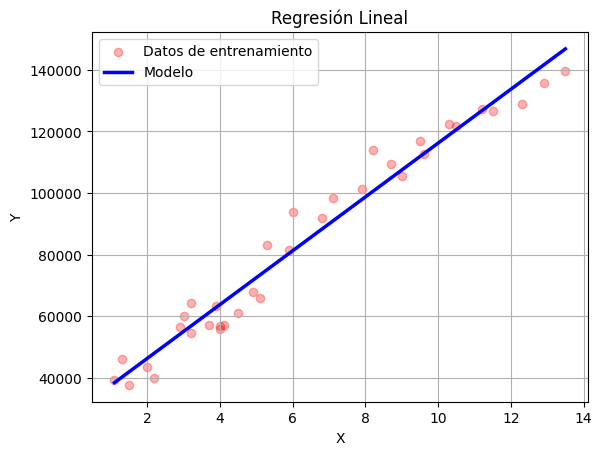

In [35]:
w_init = 0.0
b_init = 0.0
alpha = 0.01
num_iters = 10000

w_final, b_final = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters, compute_gradient)
f_wb = compute_model_output(x_train, w_final, b_final)

print(f"w, b: {w_final}, {b_final}")

plt.scatter(x_train, y_train, c="red", label="Datos de entrenamiento", alpha=0.3)
plt.plot(x_train, f_wb, c="blue", label="Modelo", linewidth=2.5)

plt.title("Regresión Lineal")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.grid(True)
plt.show()